## Import biblotek i wczytanie danych

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [53]:
df = pd.read_csv('./Date/travel insurance.csv')
df.head(20)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [54]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

## Ogólne informacje o zestawienie danych

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [56]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


## Sprawdzenie ile jest pustych wartości

In [57]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

## Korelacje

In [58]:
corrs = df[["Duration", "Net Sales", "Commision (in value)", "Age"]]

<Axes: >

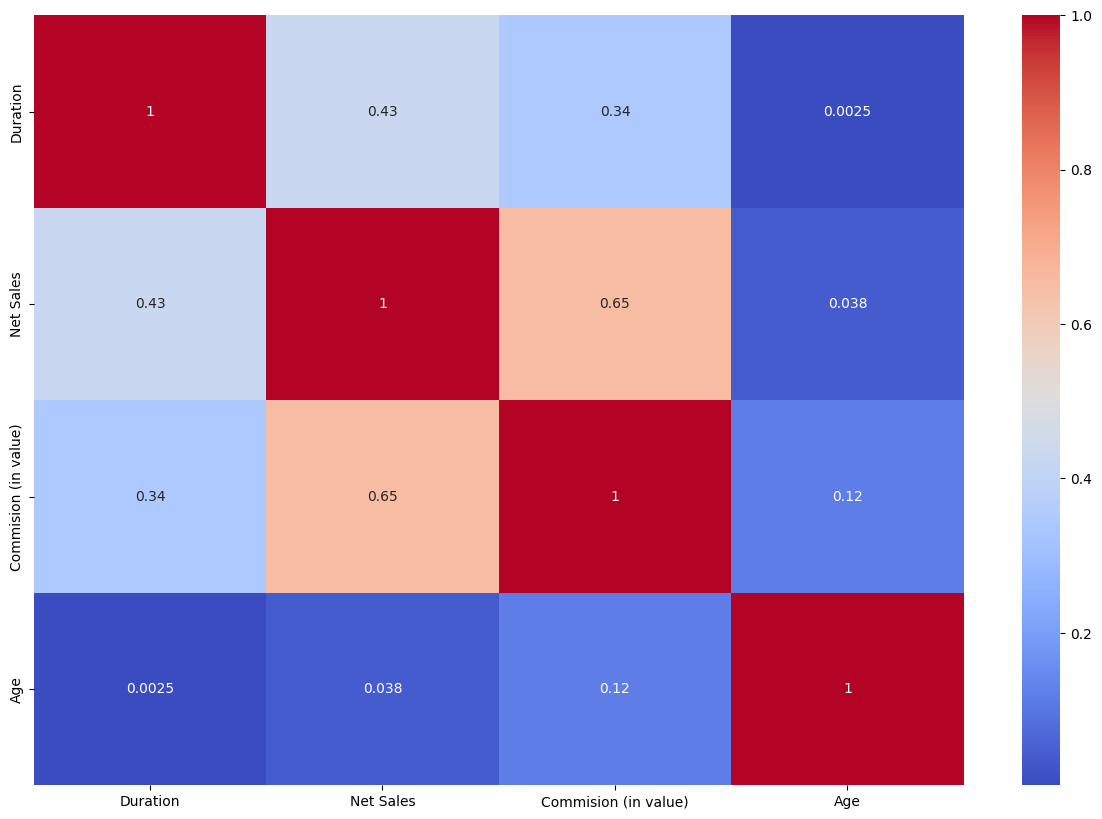

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(corrs.corr(),annot=True,cmap='coolwarm')

<BarContainer object of 63326 artists>

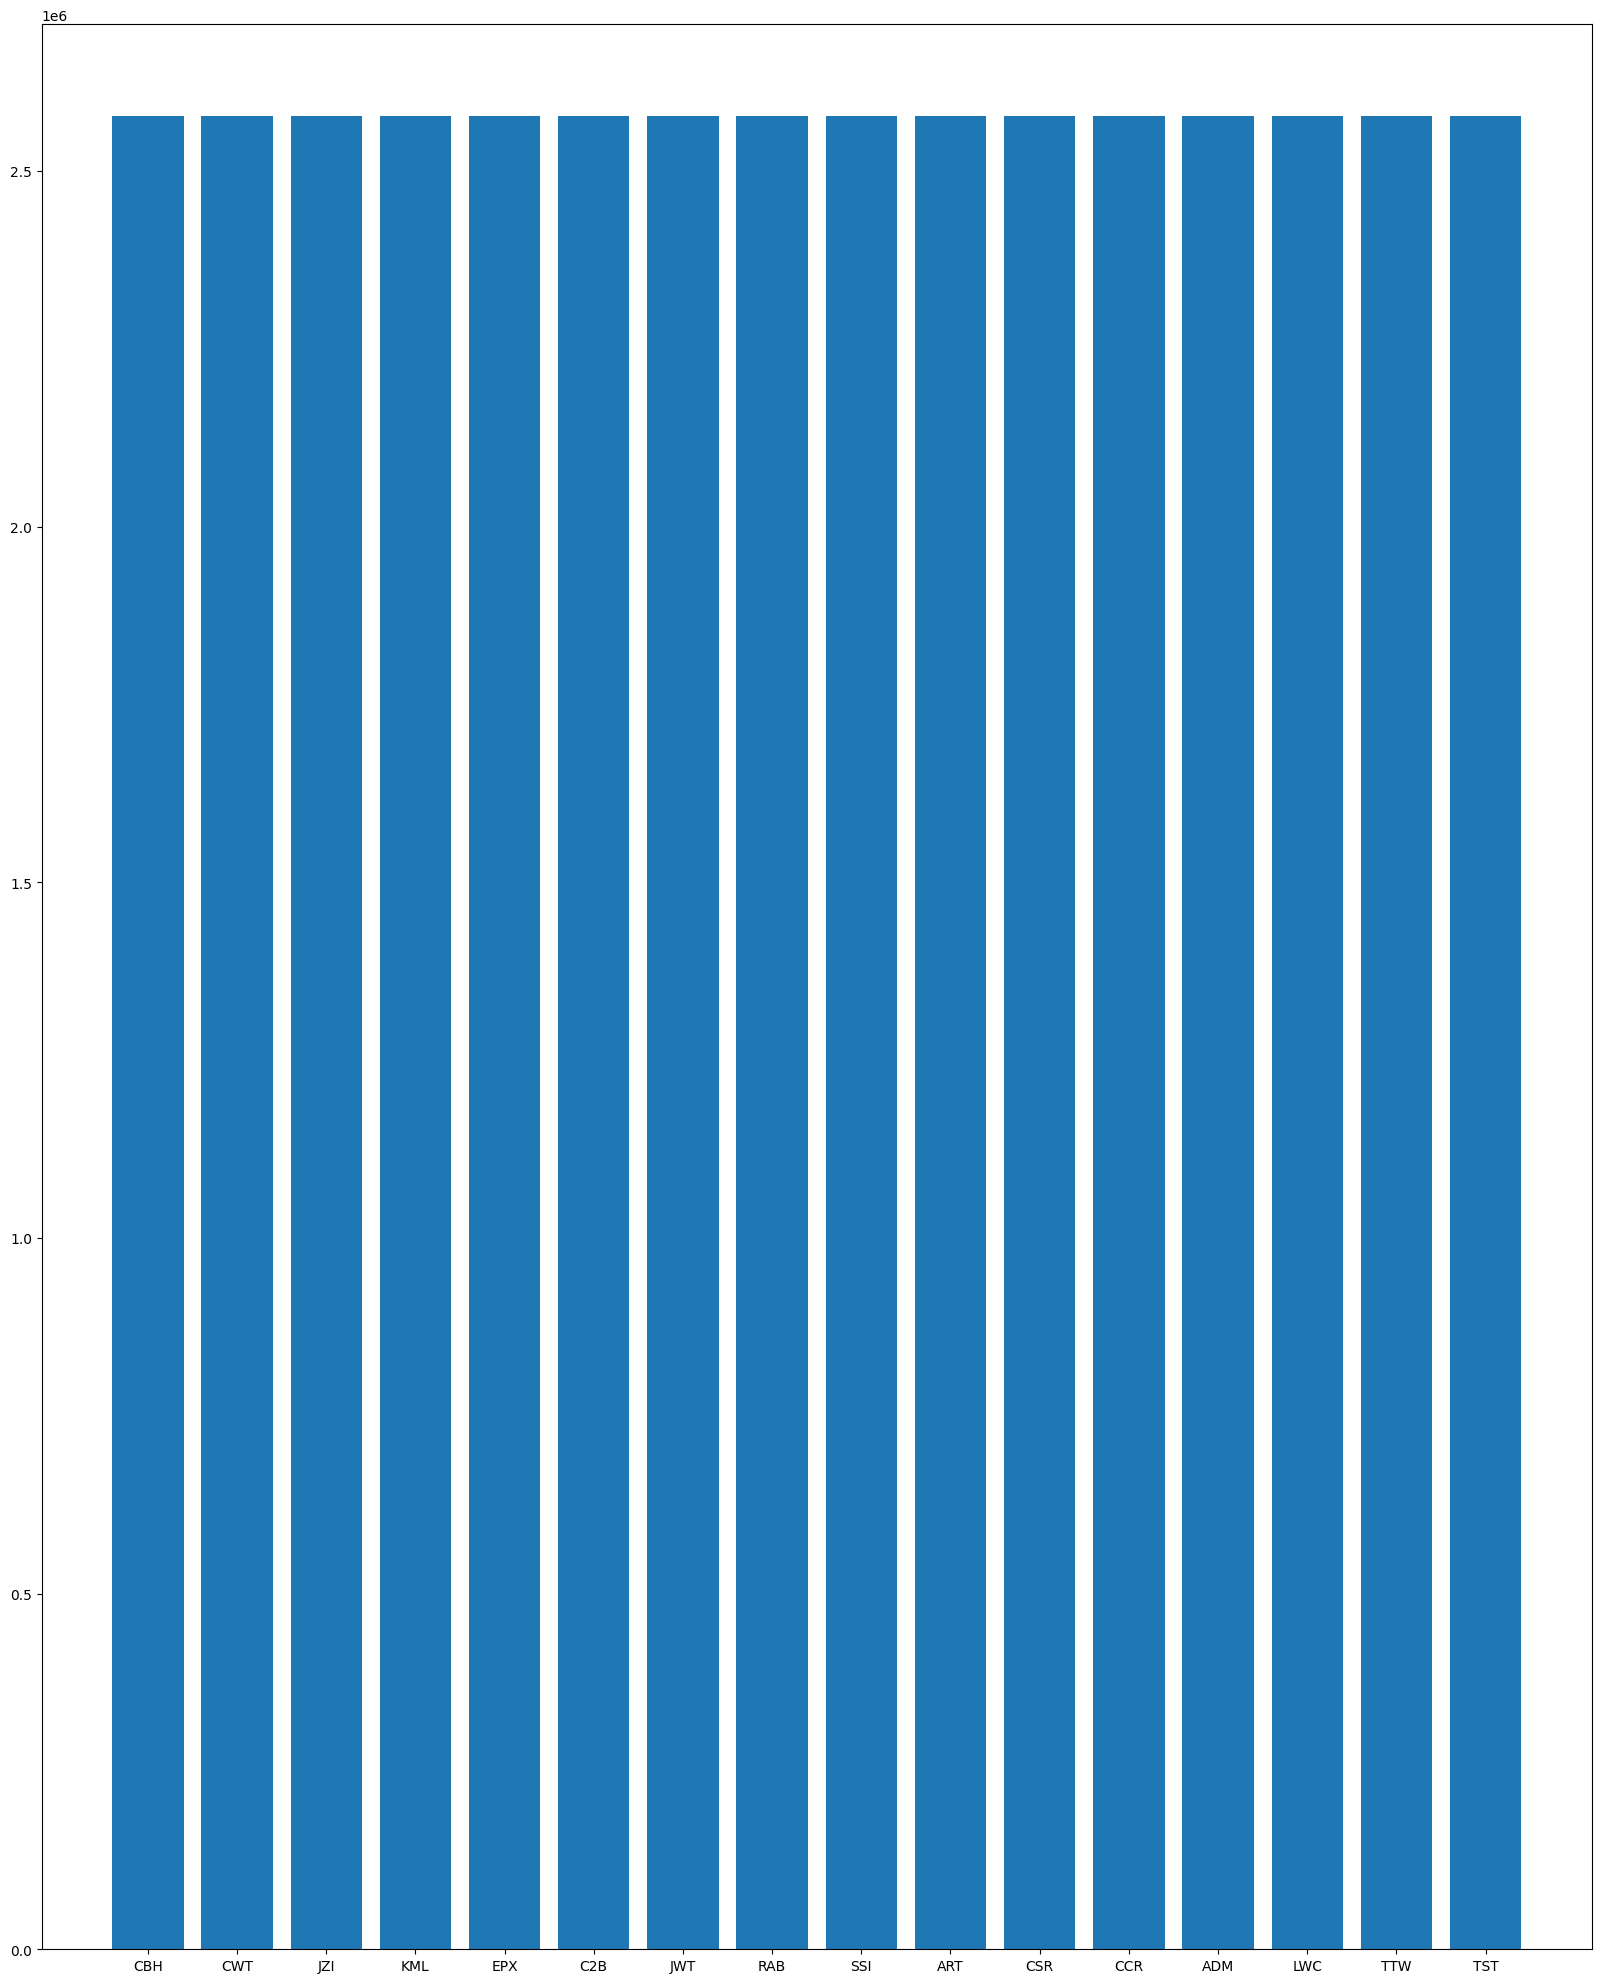

In [68]:
plt.figure(figsize=(20,25))
plt.bar(df["Agency"], df['Net Sales'].sum())

## Mapa miejsc docelowych

In [61]:
df['Destination'] = df['Destination'].str.title()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,Malaysia,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,Malaysia,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,Australia,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,Australia,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,Italy,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,Japan,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,China,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,Malaysia,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,Viet Nam,18.0,6.30,M,63


In [70]:
country_counts = df['Destination'].value_counts().reset_index()
country_counts.columns = ['Country', 'Counts']

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\Admin\AppData\Local\Temp\ipykernel_4972\4117080803.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [75]:
merged = world.set_index('name').join(country_counts.set_index('Country'))

Text(0.5, 1.0, 'Country Counts on Map')

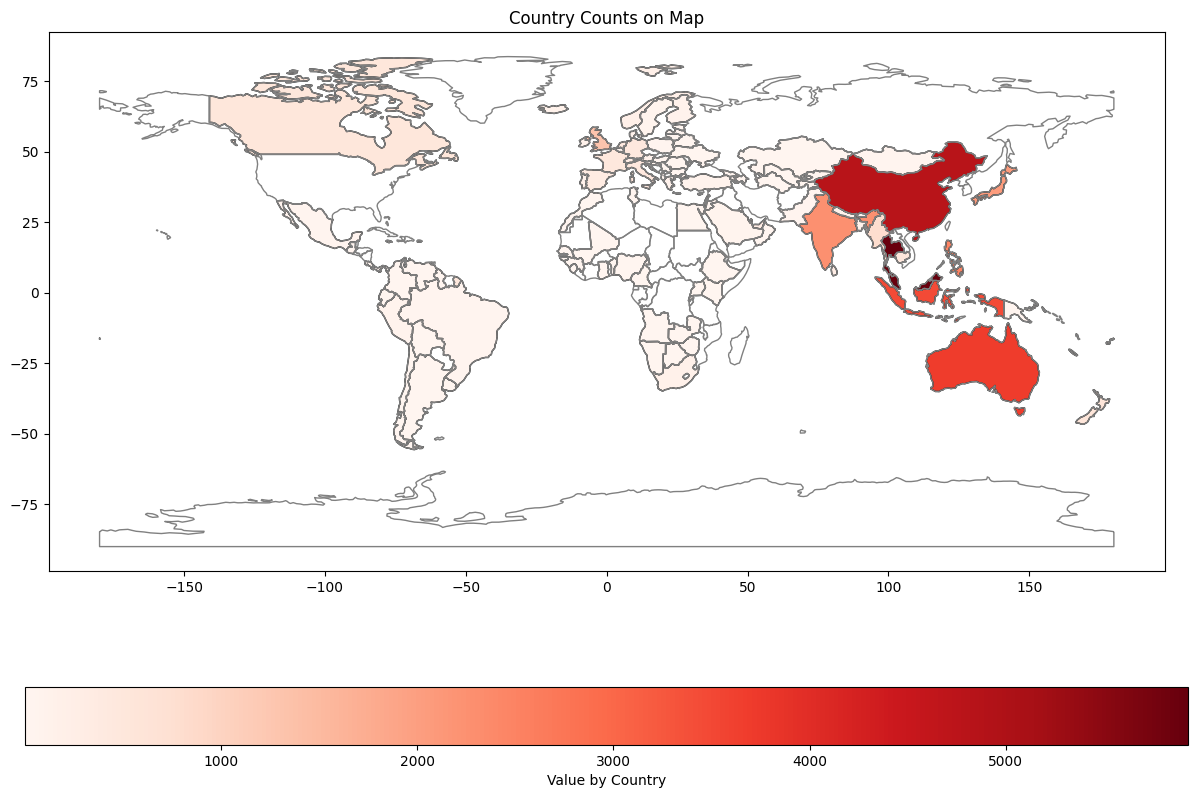

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, edgecolor='gray', linewidth=1)  # Zmienione kolory konturów i szerokość linii

# Plotowanie danych na mapie z inną mapą kolorów (np. 'viridis')
merged.plot(column='Counts', ax=ax, legend=True, cmap='Reds',
            edgecolor='black',  # Kolor konturów
            legend_kwds={'label': "Value by Country",
                         'orientation': "horizontal"})

# Dodanie tytułu
plt.title('Country Counts on Map')

#### Widać, że najwięcej docelowych krajów znajdują się w Azji